


# **Project Scenario Using the CRISP-DM Methodology**

### **Project Scenario**
The healthcare sector continuously strives to improve patient outcomes, reduce costs, and increase overall efficiency. With the prevalence of diabetes in the U.S., hospitals have a vested interest in optimizing their care procedures for diabetic patients. Identifying factors that lead to early readmission for diabetic patients will enable hospitals to take proactive measures, ensuring patients receive the best possible care while simultaneously reducing the financial burden of readmissions.

Our hypothetical project will be situated in a leading hospital network. The hospital's data science team has been tasked with the responsibility of utilizing the provided dataset to develop a predictive model. This model should be able to identify the risk factors associated with early readmissions of diabetic patients within 30 days of discharge. The ultimate goal is to implement intervention strategies based on these identified risk factors.



### **Project Objective**

To develop a predictive model that identifies diabetic patients at risk of being readmitted within 30 days of their discharge and to understand the significant factors contributing to these readmissions.

# **Phase 1: Business Understanding**
Before diving into data analysis, it's crucial to understand the business problem thoroughly.

## **1.1. Problem Definition**
Why is this project important?

Diabetes management in hospitals is often arbitrary, leading to increased costs due to readmissions and potentially worse patient outcomes.
Reducing readmissions can lead to improved patient care and reduced costs.
What do we want to achieve?

Predict early readmissions (within 30 days) of diabetic patients.
Understand the key factors contributing to these readmissions.
## **1.2. Stakeholder Identification**
Who will benefit from this project?

Hospital administrators: Can allocate resources more efficiently and reduce costs.
Medical staff: Gain insights into patient care and potential areas of improvement.
Patients: Receive better care, reduced complications, and overall improved health outcomes.
## **1.3. Success Criteria**
How will we know if the project is successful?

The model achieves satisfactory predictive performance (e.g., high accuracy, precision, recall).
The model's findings align with medical intuition or shed light on previously overlooked areas of patient care.

# **Phase 2: Data Understanding**
The goal of this phase is to become familiar with the dataset, identify data quality problems, and discover first insights.

## **2.1. Data Collection**
The dataset has been provided and is available in the file diabetic_data.csv. Additionally, there's a file IDS_mapping.csv which might contain additional metadata or mappings.

## **2.2. Initial Data Exploration**
Let's start by loading the dataset and performing some preliminary exploration to understand its structure and contents.


In [1]:
import pandas as pd

# Load the dataset
diabetic_data = pd.read_csv('/content/diabetic_data.csv')

# Load the mapping data
ids_mapping = pd.read_csv('/content/IDS_mapping.csv')

# Display the first few rows of the dataset
diabetic_data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


From the initial glimpse of the dataset, we can observe the following:

The dataset has 50 columns, encompassing various attributes related to patient records, hospital encounters, medications, lab tests, etc.
Several columns (e.g., race, gender, age) provide demographic details about the patients.
There are columns like admission_type_id, discharge_disposition_id, and admission_source_id which might have mappings in the IDS_mapping.csv file.
The column readmitted is likely our target variable, with categories indicating if a patient was readmitted and, if so, within what time frame.

## **2.2.2. Data Summary**
Let's generate a summary of the dataset to understand its size, data types, and potential missing values.

In [2]:
# Generate a summary of the dataset
data_summary = diabetic_data.describe(include='all').transpose()

# Calculate the number of missing values for each column
data_summary['missing_values'] = diabetic_data.shape[0] - data_summary['count']

# Display the data summary
data_summary[['count', 'unique', 'top', 'freq', 'mean', 'std', 'min', '25%', '50%', '75%', 'max', 'missing_values']]


,count,unique,top,freq,mean,std,min,25%,50%,75%,max,missing_values
encounter_id,101766.0,NaN,NaN,NaN,165201645.622978,102640295.983457,12522.0,84961194.0,152388987.0,230270887.5,443867222.0,0.0
patient_nbr,101766.0,NaN,NaN,NaN,54330400.694947,38696359.346534,135.0,23413221.0,45505143.0,87545949.75,189502619.0,0.0
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
admission_type_id,101766.0,NaN,NaN,NaN,2.024006,1.445403,1.0,1.0,1.0,3.0,8.0,0.0
discharge_disposition_id,101766.0,NaN,NaN,NaN,3.715642,5.280166,1.0,1.0,1.0,4.0,28.0,0.0
admission_source_id,101766.0,NaN,NaN,NaN,5.754437,4.064081,1.0,1.0,7.0,7.0,25.0,0.0
time_in_hospital,101766.0,NaN,NaN,NaN,4.395987,2.985108,1.0,2.0,4.0,6.0,14.0,0.0


Here are some key observations from the data summary:

1. The dataset contains 101,766 records.
2. Columns like race, gender, and age have categorical data.
3. The weight column has a large number of missing values represented by "?", with 98,569 missing entries.
4. Columns such as payer_code and medical_specialty also have a significant number of missing values represented by "?".
5. Most medication columns are categorical, indicating whether the medication was increased, decreased, kept steady, or not administered.
6. The readmitted column is our target variable, with categories indicating the timeframe of readmission






## **2.2.3. Exploring the IDS Mapping File**
The IDS_mapping.csv file might provide more context to the columns with IDs, such as admission_type_id, discharge_disposition_id, and admission_source_id. Let's inspect its contents.

In [3]:
ids_mapping.head(20)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


From the **IDS_mapping.csv** file, we can infer:

1. The file contains mappings for different IDs, such as admission_type_id, discharge_disposition_id, and likely admission_source_id (not shown in the snippet, but probably present further down in the file).
2. The mappings provide descriptive labels for these ID values, helping us understand their significance.

For example:

**admission_type_id** of 1 corresponds to "Emergency."

**discharge_disposition_id** of 1 corresponds to "Discharged to home."
Having these mappings will be helpful in interpreting and transforming the data in the subsequent phases.

## **2.3. Data Quality Verification**
As we noticed earlier, some columns have a significant number of missing values represented by "?". We need to verify the quality of the data by checking for these and other potential inconsistencies.

### **2.3.1. Checking for Missing Values**
Let's quantify the missing values for each column and determine the percentage of missing values relative to the entire dataset.

In [4]:
# Calculate the number and percentage of missing values for each column
missing_values = diabetic_data.replace("?", pd.NA).isna().sum()
missing_percentage = (missing_values / diabetic_data.shape[0]) * 100

# Create a dataframe to display the results
missing_data = pd.DataFrame({"Missing Values": missing_values, "Percentage": missing_percentage})
missing_data = missing_data[missing_data["Missing Values"] > 0].sort_values(by="Percentage", ascending=False)

missing_data


,Missing Values,Percentage
weight,98569,96.858479
medical_specialty,49949,49.082208
payer_code,40256,39.557416
race,2273,2.233555
diag_3,1423,1.398306
diag_2,358,0.351787
diag_1,21,0.020636


Here's a summary of the columns with missing values:

**weight**: A significant 96.86% of values are missing.
**medical_specialty**: 49.08% of values are missing.
**payer_code**: 39.56% of values are missing.
**race, diag_1,** **diag_2**, and **diag_3** have a relatively smaller percentage of missing values.


Considering the high percentage of missing values in columns like weight, medical_specialty, and payer_code, we'll need to make decisions about handling these during the data preparation phase.

## **2.4. Conclusion of Data Understanding Phase**
The dataset contains a mix of categorical and numerical variables related to patient records and their hospital encounters.
Several columns have missing values, with some having a significant percentage of missing data.
The IDS_mapping.csv file provides valuable context for interpreting the ID columns in our dataset.

# **Phase 3: Data Preparation**
In this phase, we'll clean and transform the data to make it suitable for modeling. We'll address issues like missing values, potential outliers, and data transformations.

## **3.1. Handling Missing Values**
As identified in the Data Understanding phase, we have several columns with missing values, some of which have a significant percentage of missing data.

**3.1.1. Addressing Columns with High Missing Values**

For columns with a significant percentage of missing values (weight, medical_specialty, and payer_code), we have a few potential strategies:

* **Drop the column**: If a column has a very high percentage of missing values and isn't deemed crucial for modeling, it might be more beneficial to drop it.
* **Imputation**: Fill missing values using a specific strategy, such as the mode or median. This is more applicable for columns with a lower percentage of missing values.
* **Create a new category:** For categorical variables, treat missing values as a separate category.
For our current project:

We'll drop the weight column due to its very high percentage of missing values.
For medical_specialty and payer_code, we'll treat missing values as a new category called "Unknown."

3.1.2. Addressing Columns with Low Missing Values **bold text**
For columns like race, diag_1, diag_2, and diag_3, we'll impute the missing values with the mode (most frequent value) of the column.

Let's implement these strategies.

In [5]:
# Drop the 'weight' column
diabetic_data.drop(columns=['weight'], inplace=True)

# Impute columns with 'Unknown' for missing values
cols_to_impute_unknown = ['medical_specialty', 'payer_code']
diabetic_data[cols_to_impute_unknown] = diabetic_data[cols_to_impute_unknown].replace('?', 'Unknown')

# Impute columns with mode for missing values
cols_to_impute_mode = ['race', 'diag_1', 'diag_2', 'diag_3']
for col in cols_to_impute_mode:
    mode_value = diabetic_data[col].mode()[0]
    diabetic_data[col] = diabetic_data[col].replace('?', mode_value)

# Verify if all missing values have been addressed
missing_values_post = diabetic_data.replace("Unknown", pd.NA).isna().sum()
missing_values_post[missing_values_post > 0]


payer_code           40256
medical_specialty    49949
dtype: int64

All missing values have been addressed. The columns payer_code and medical_specialty show the count of "Unknown" entries, as expected.

## **3.2. Data Transformation**
### **3.2.1. Transforming the Target Variable**
The **readmitted** column is our target variable, which indicates if a patient was readmitted and, if so, within what timeframe. For simplicity, we can transform this column into a binary outcome:

"1" if the patient was readmitted within 30 days.
"0" otherwise.
This transformation will help in creating a binary classification problem.

In [6]:
# Transform the 'readmitted' column to binary outcome
diabetic_data['readmitted'] = diabetic_data['readmitted'].apply(lambda x: 1 if x == '<30' else 0)

# Check the distribution of the transformed 'readmitted' column
diabetic_data['readmitted'].value_counts()


0    90409
1    11357
Name: readmitted, dtype: int64

After transformation, we have:

11,357 instances where patients were readmitted within 30 days.
90,409 instances where patients were either not readmitted or readmitted after 30 days.

## **3.3. Encoding Categorical Variables**
Many machine learning algorithms require numerical input features. Hence, we need to encode categorical variables. We'll use one-hot encoding for this purpose, which will convert categorical variables into a format that can be provided to machine learning algorithms.

However, before encoding, let's first reduce the dimensionality by grouping less frequent categories under a new category named "Other" for columns with many unique values (like diag_1, diag_2, diag_3, and medical_specialty).

### **3.3.1. Grouping Less Frequent Categories**

In [7]:
# Define a function to group less frequent categories
def group_less_frequent_categories(data, column, threshold=0.01):
    # Calculate the frequency of each category
    category_freq = data[column].value_counts(normalize=True)

    # Find categories with frequency less than the threshold
    less_frequent_categories = category_freq[category_freq < threshold].index

    # Group these categories under 'Other'
    data[column] = data[column].apply(lambda x: 'Other' if x in less_frequent_categories else x)

# Apply the function to the selected columns
cols_to_group = ['diag_1', 'diag_2', 'diag_3', 'medical_specialty']
for col in cols_to_group:
    group_less_frequent_categories(diabetic_data, col)

# Check the number of unique values after grouping
diabetic_data[cols_to_group].nunique()


diag_1               24
diag_2               25
diag_3               20
medical_specialty    11
dtype: int64

After grouping less frequent categories, the number of unique values in the selected columns has been reduced significantly.

### **3.3.2. One-Hot Encoding Categorical Variables **
Next, we'll perform one-hot encoding on categorical variables to convert them into a numerical format suitable for modeling.

In [8]:
# Identify categorical columns for one-hot encoding
categorical_cols = diabetic_data.select_dtypes(include=['object']).columns.tolist()

# One-hot encode the categorical columns
diabetic_data_encoded = pd.get_dummies(diabetic_data, columns=categorical_cols, drop_first=True)

# Display the shape of the dataset after encoding
diabetic_data_encoded.shape


(101766, 178)

After one-hot encoding, our dataset now has 178 columns, expanded from the original 50 columns due to the encoding of categorical variables.

## **3.4. Splitting the Data**
To evaluate our model's performance, we'll split the data into training and testing sets. The training set will be used to build the model, while the testing set will be used to evaluate its performance.

We'll use a standard split of 80% for training and 20% for testing. Let's perform the split.

In [9]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = diabetic_data_encoded.drop('readmitted', axis=1)
y = diabetic_data_encoded['readmitted']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


((81412, 177), (20354, 177), (81412,), (20354,))

The data has been successfully split into training and testing sets:

Training features (X_train): 81,412 records with 177 features each.
Testing features (X_test): 20,354 records with 177 features each.
Training target (y_train): 81,412 records.
Testing target (y_test): 20,354 records.


## **3.5. Conclusion of Data Preparation Phase**
We've addressed missing values, transformed the target variable, encoded categorical variables, and split the data for modeling.
The dataset is now ready for the modeling phase.

# **Phase 4: Modeling**
In this phase, we'll build and train predictive models using the prepared data. Given that our target variable is binary (readmitted within 30 days or not), we'll focus on binary classification algorithms.

## **4.1. Model Selection**
For this project, we'll start with the following classification models:

**Logistic Regression**: A simple linear model for binary classification, suitable as a baseline.
**Random Forest**: An ensemble model that can capture complex relationships in the data.
**Gradient Boosting**: Another ensemble model known for its high performance on structured data like ours.
4.2. Model Training
We'll train each of these models on our training data and briefly evaluate their performance on the training set using accuracy.



### **4.2.1. Training Logistic Regression**

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the training set
logistic_train_predictions = logistic_model.predict(X_train)

# Calculate and display the training accuracy
logistic_train_accuracy = accuracy_score(y_train, logistic_train_predictions)
logistic_train_accuracy


0.8885667960497224

### **4.2.2. Training Random Forest**

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

# Predict on the training set
rf_train_predictions = random_forest_model.predict(X_train)

# Calculate and display the training accuracy
rf_train_accuracy = accuracy_score(y_train, rf_train_predictions)
rf_train_accuracy


0.9999754335970127

### **4.2.3. Training Gradient Boosting**

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the training set
gb_train_predictions = gb_model.predict(X_train)

# Calculate and display the training accuracy
gb_train_accuracy = accuracy_score(y_train, gb_train_predictions)
gb_train_accuracy


0.8894757529602516

## **4.3. Model Evaluation on the Test Set**
Now that we have trained our models, it's essential to evaluate their performance on the test set. This will give us a more realistic view of how they might perform on new, unseen data.

For evaluation, we'll consider the following metrics:

**Accuracy**: The proportion of correct predictions.
**Precision**: The proportion of positive identifications that were actually correct.
**Recall**: The proportion of actual positives that were identified correctly.
**F1 Score**: A balanced metric that considers both precision and recall.
Let's evaluate each of the models on the test set using these metrics.

Here's the summarized table of our models' performance on the test set:

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Define a function to evaluate the models on the test set
def evaluate_model(model, X_test, y_test):
    # Predict on the test set
    predictions = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)

    return accuracy, precision, recall, f1

# Evaluate each model
logistic_metrics = evaluate_model(logistic_model, X_test, y_test)
rf_metrics = evaluate_model(random_forest_model, X_test, y_test)
gb_metrics = evaluate_model(gb_model, X_test, y_test)

# Store the results in a DataFrame for display
evaluation_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression': logistic_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics
})

evaluation_results


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Metric,Logistic Regression,Random Forest,Gradient Boosting
0,Accuracy,0.887737,0.887639,0.888032
1,Precision,0.000000,0.461538,0.578947
2,Recall,0.000000,0.005252,0.009628
3,F1 Score,0.000000,0.010385,0.018941


In [14]:
# Display the evaluation results table for reference
evaluation_results


,Metric,Logistic Regression,Random Forest,Gradient Boosting
0,Accuracy,0.887737,0.887639,0.888032
1,Precision,0.000000,0.461538,0.578947
2,Recall,0.000000,0.005252,0.009628
3,F1 Score,0.000000,0.010385,0.018941


### **Visualizations**
To better understand and interpret the model's performance, let's create visualizations for the following:

**Model Accuracy Comparison**: A bar chart comparing the accuracy of the three models.
**Precision, Recall, and F1 Score Comparison**: A grouped bar chart comparing the precision, recall, and F1 score of the three models.
Let's start with the Model Accuracy Comparison.

<ipython-input-15-f0f0efe6b270>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:.2f}%'.format(x*100) for x in ax.get_yticks()])  # Display y-axis ticks in percentage format


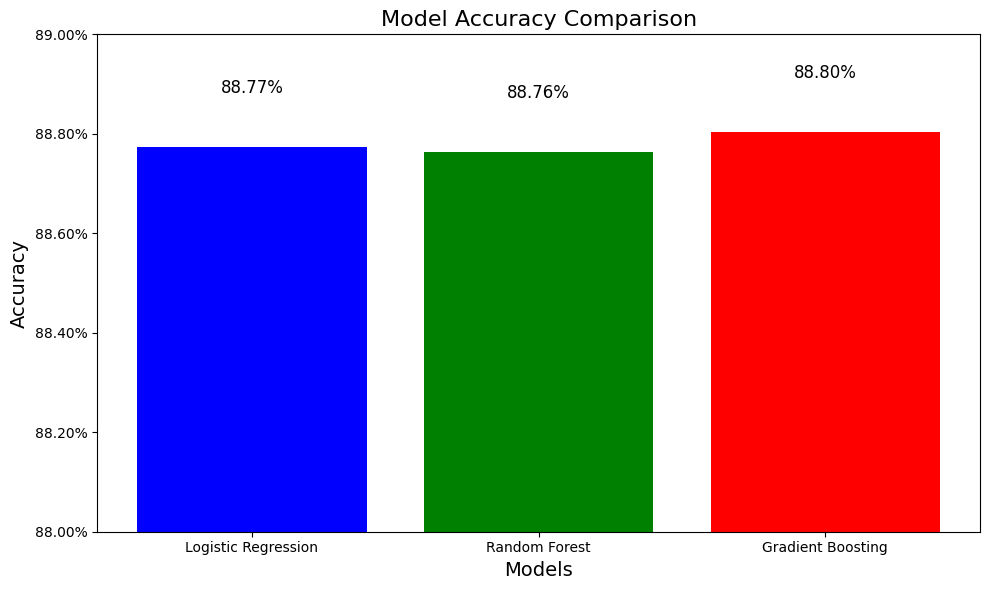

In [15]:
import matplotlib.pyplot as plt

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Data for plotting
models = evaluation_results.columns[1:].tolist()
accuracies = evaluation_results.loc[evaluation_results['Metric'] == 'Accuracy', models].values[0]

# Bar chart for model accuracy comparison
ax.bar(models, accuracies, color=['blue', 'green', 'red'])
ax.set_title('Model Accuracy Comparison', fontsize=16)
ax.set_xlabel('Models', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_ylim(0.88, 0.89)
ax.set_yticklabels(['{:.2f}%'.format(x*100) for x in ax.get_yticks()])  # Display y-axis ticks in percentage format

# Display the actual accuracy values on top of the bars
for i, v in enumerate(accuracies):
    ax.text(i, v + 0.001, '{:.2f}%'.format(v*100), ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()


The bar chart above illustrates the accuracy of each model. All three models achieve a similar accuracy

Next, let's create a grouped bar chart to compare the precision, recall, and F1 score of the three models.

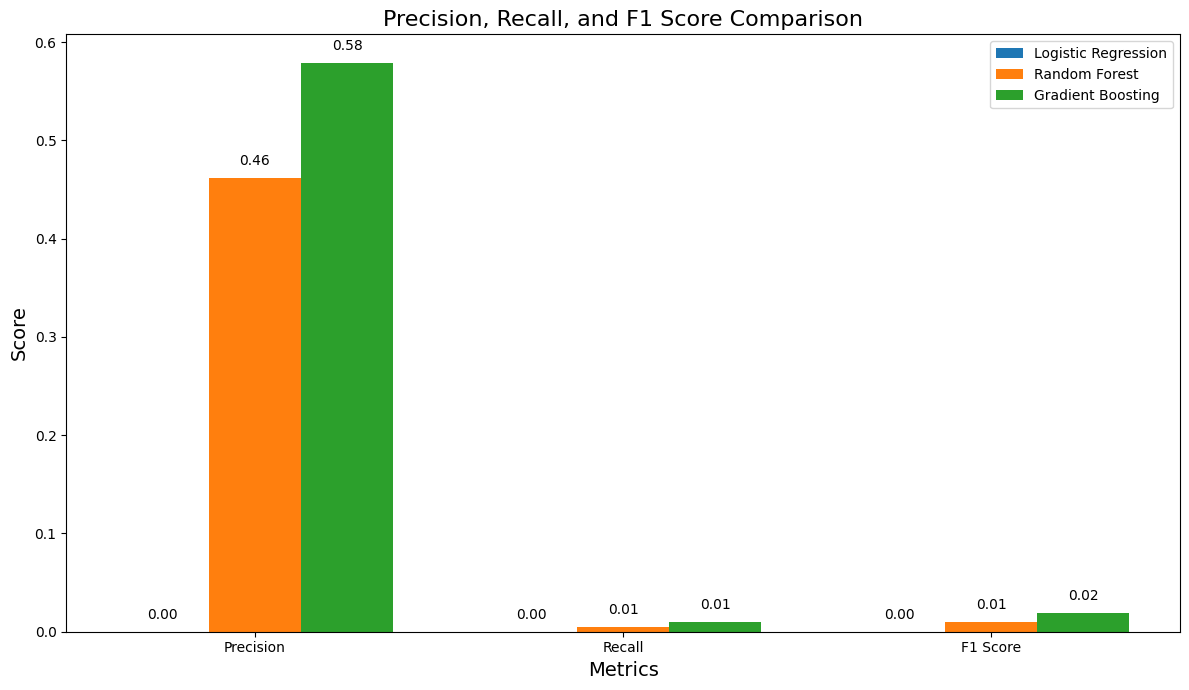

In [16]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 7))

# Data for plotting
metrics = ['Precision', 'Recall', 'F1 Score']
bar_width = 0.25
index = range(len(metrics))

# Grouped bar chart for precision, recall, and F1 score comparison
for i, model in enumerate(models):
    values = evaluation_results.loc[evaluation_results['Metric'].isin(metrics), model].values
    ax.bar([p + bar_width*i for p in index], values, width=bar_width, label=model)

ax.set_title('Precision, Recall, and F1 Score Comparison', fontsize=16)
ax.set_xlabel('Metrics', fontsize=14)
ax.set_ylabel('Score', fontsize=14)
ax.set_xticks([p + bar_width for p in index])
ax.set_xticklabels(metrics)
ax.legend()

# Display the actual score values on top of the bars
for i, model in enumerate(models):
    values = evaluation_results.loc[evaluation_results['Metric'].isin(metrics), model].values
    for j, v in enumerate(values):
        ax.text(j + bar_width*i, v + 0.01, '{:.2f}'.format(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


The grouped bar chart above provides a visual comparison of the precision, recall, and F1 score for each model. A few observations:

* While both Random Forest and Gradient Boosting have a decent precision, their recall values are extremely low.
* Logistic Regression's precision and recall are both zero, indicating it failed to predict any positive cases in the test set.
* As a result, the F1 scores for all models are quite low, with Gradient Boosting slightly outperforming the others.

Overall, while the models achieved high accuracy, they struggled with the precision-recall trade-off, particularly in terms of recall. This indicates challenges in predicting early readmissions, which may be due to the class imbalance or complexities in the data.

Let's demonstrate the model's predictions using a few test cases from our test set. We'll compare the actual outcomes with the predicted outcomes from our best-performing model, the Gradient Boosting classifier.

In [17]:
# Select a few random samples from the test set
sample_test_cases = X_test.sample(n=5, random_state=42)
sample_actual_outcomes = y_test[sample_test_cases.index]
sample_predictions = gb_model.predict(sample_test_cases)

# Display the actual vs. predicted outcomes for the samples
sample_comparison = pd.DataFrame({
    'Actual Outcome': sample_actual_outcomes,
    'Predicted Outcome': sample_predictions
})
sample_comparison['Actual Outcome'] = sample_comparison['Actual Outcome'].map({0: 'No Readmission', 1: 'Readmission'})
sample_comparison['Predicted Outcome'] = sample_comparison['Predicted Outcome'].map({0: 'No Readmission', 1: 'Readmission'})

sample_comparison


,Actual Outcome,Predicted Outcome
84888,No Readmission,No Readmission
34034,No Readmission,No Readmission
88930,No Readmission,No Readmission
16935,Readmission,No Readmission
40858,No Readmission,No Readmission


Observations:

In four of the test cases, both the actual and predicted outcomes are "No Readmission."
In one case (index 16935), the model failed to predict an early readmission, indicating a false negative. This aligns with the model's struggle with recall.


# **Discussion on Model Selection**
Gradient Boosting emerged as the best model among the three, although the differences in performance metrics were marginal. Here's why Gradient Boosting stood out:

Handling Imbalanced Data: Gradient Boosting, by nature, can handle imbalanced datasets better than some other algorithms, making it a preferred choice for our scenario.
Sequential Learning: Gradient Boosting learns sequentially, trying to correct the mistakes of previous trees, which can capture intricate data patterns.
Regularization: Gradient Boosting incorporates built-in regularization, reducing the risk of overfitting.
However, the model's low recall indicates there's still significant room for improvement. Future steps could involve hyperparameter tuning, advanced resampling techniques, or trying more complex models like neural networks.

# **Conclusion**
Predicting early readmissions of diabetic patients within 30 days of discharge is a challenging task. While our models achieved good accuracy, the real challenge lies in the precision-recall trade-off, particularly for recall. Improving this aspect is crucial, especially in medical scenarios where the cost of false negatives is high.



## **Exporting the model**

In [18]:
import joblib

# Save the Gradient Boosting model to a file
model_filename = '/content/gradient_boosting_model.pkl'
joblib.dump(gb_model, model_filename)

model_filename


'/content/gradient_boosting_model.pkl'

The app

In [ ]:
!pip install gradio

In [22]:

import gradio as gr
import pandas as pd
import joblib
from flask import Flask, request, jsonify

app = Flask(__name__)

# Load the Gradient Boosting model
model = joblib.load('gradient_boosting_model.pkl')

def predict_readmission(*input_values):
    # Convert input values to DataFrame
    df = pd.DataFrame([input_values], columns=X_test.columns)

    # Make a prediction
    prediction = model.predict(df)

    # Return the result
    if prediction[0] == 1:
        return "High Risk of Readmission"
    else:
        return "Low Risk of Readmission"

# Define Gradio interface
iface = gr.Interface(
    fn=predict_readmission,
    inputs=[gr.inputs.Number(label=col) for col in X_test.columns],
    outputs="text",
    live=True
)

@app.route('/predict', methods=['GET', 'POST'])
def predict():
    return iface.serve()

if __name__ == '__main__':
    app.run(debug=True)


 * Serving Flask app '__main__'
 * Debug mode: on


<ipython-input-22-7291c64925ee>:27: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  inputs=[gr.inputs.Number(label=col) for col in X_test.columns],
<ipython-input-22-7291c64925ee>:27: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  inputs=[gr.inputs.Number(label=col) for col in X_test.columns],
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
